# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The basic idea is to find the best-fitting line (or hyperplane in the case of multiple independent variables) that minimizes the sum of the squared differences between the observed values and the values predicted by the linear model.

The linear regression equation for a simple linear regression with one independent variable is given by:

$ y = ax + b $

a - The slope

b - The intercept

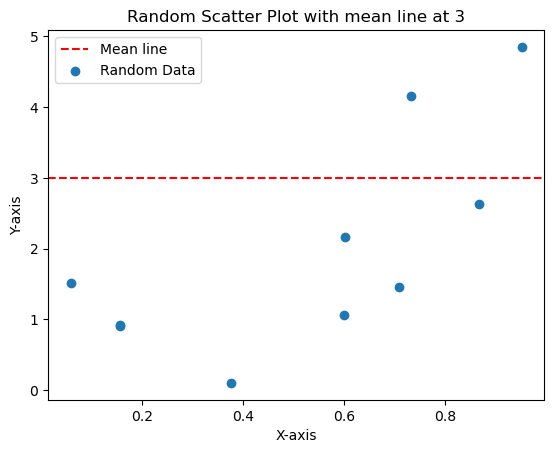

In [2]:
np.random.seed(42)
x = np.random.rand(10)  
y = np.random.rand(10) * 5  


plt.scatter(x, y, label='Random Data')
plt.axhline(y=3, color='r', linestyle='--', label='Mean line')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Scatter Plot with mean line at 3')
plt.legend()
plt.show()

The measure of how well the line fits the data is called **sum of squared residuals** because the residuals are the difference betweeen the real data and the line. We sum the squares of these values.

sum of squared reisuals = (b-y1)^2 + (b-y2)^2 + (b-y3)^2 + (b-y4)^2

Since we want the line that will give the smallest sum of squares, this method for finding thr best value for a and b is called _least squares_

In [3]:
diabetis_df = pd.read_csv('Data/diabetes_clean.csv')
print(diabetis_df.shape)
diabetis_df.head()

(768, 9)


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Predict Blood sugar levels from a single feature.

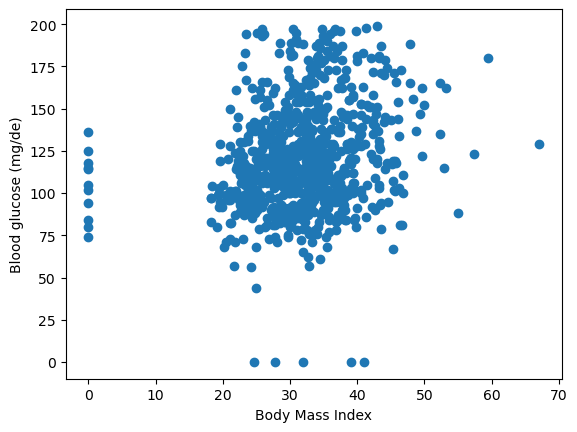

In [4]:
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

# make predictions from a single feature bmi
X_bmi = X[:,4]
X_bmi = X_bmi.reshape(-1,1)

plt.scatter(X_bmi, y)
plt.ylabel("Blood glucose (mg/de)")
plt.xlabel("Body Mass Index")
plt.show()

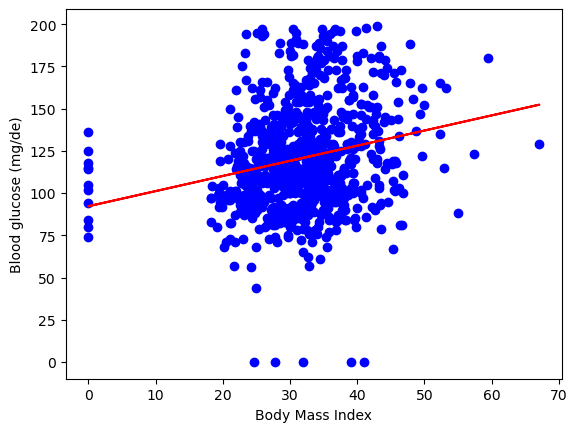

In [5]:
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y, color="blue")
plt.plot(X_bmi, predictions, color="red")
plt.ylabel("Blood glucose (mg/de)")
plt.xlabel("Body Mass Index")
plt.show()

### Predict Blood sugar levels from many features.

In [6]:
# X is the feature , y is the target
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Predictions: {}, Actual Values: {}".format(y_pred[:5], y_test[:5]))

Predictions: [119.91303675  95.70325357 104.63962314 114.05040231 118.58321727], Actual Values: [ 98 112 108 107 136]


### R-Squared ($R^2$) 

$R^2$ is a metric of correlation that is easy to compute and intuitive to interpret. Calculating $R^2$ is the first step in determining how good a line is. Note that correlations close to 1 or -1 are good while those close to 0 are lame.

$$ R^2 = \frac{{\text{Var(mean)} - \text{Var(fit)}}}{{\text{Var(mean)}}} $$

$R^2$ ranges from 0 to 1. If $R^2$ is 0.81 or 81%, this means there is 81% less variation around the fit than the mean. Or rather, the two feature account for 81% of the variation.


In [7]:
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# model's accuracy on test data is 28%
r_squared = reg.score(X_test, y_test)
r_squared

0.28280468810375137

### RMSE

Root Mean Square Error (RMSE) is a commonly used metric to measure the accuracy of a predictive model. It is particularly popular in the field of regression analysis and machine learning for evaluating the performance of a model in predicting numerical outcomes. RMSE is calculated as the square root of the mean of the squared differences between predicted and actual values. The formula for RMSE is as follows:


$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Where:

- n is the number of observations or data points.
- $y_i$ represents the actual values.
- $\hat{y}_i$ represents the predicted values.

In simpler terms, RMSE measures the average magnitude of the errors between predicted and actual values. A lower RMSE indicates better model performance, as it means that the predictions are closer to the actual values.

It's important to note that RMSE is sensitive to outliers, meaning that large errors in prediction can significantly influence the result.


In [8]:
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

26.34145958223226

In [9]:
# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.28280468810375137
RMSE: 26.34145958223226


## Cross Validation

**Cross-validation** is a statistical technique used to assess the performance and generalizability of a predictive model, such as linear regression, by dividing the dataset into multiple subsets and using each subset for both training and testing the model. This helps to evaluate how well the model would perform on an independent dataset.

In the context of linear regression, the most common form of cross-validation is k-fold cross-validation. Here's how it works:

- Dataset Splitting:
The dataset is divided into k subsets or folds.
The model is trained on k-1 of these folds and validated on the remaining fold.

- Training and Validation:
The model is trained on k-1 folds and validated on the fold left out.
This process is repeated k times, each time using a different fold as the validation set.

- Performance Evaluation:
The performance metrics (e.g., Mean Squared Error, R-squared) are recorded for each iteration.

- Average Performance:
The performance metrics are averaged over all k iterations to obtain a more robust estimation of the model's performance.

By repeating this process, you get a more reliable estimate of how well your model is likely to perform on new, unseen data. This is particularly important in linear regression to ensure that the model is not overfitting or underfitting the training data.

Common choices for the value of k are 5 or 10, but the appropriate choice depends on the size and nature of your dataset.

Cross-validation helps in addressing issues like _overfitting_ or _biased performance evaluation_ that may occur when using a single train-test split. It provides a more realistic estimate of how the model will perform on new data and helps in selecting hyperparameters that generalize well across different subsets of the dataset.

In [10]:
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y,cv=kf)

# Print scores
print(cv_scores)

[0.37915966 0.29257178 0.38953015 0.22314647 0.3677666  0.31175482]


In [11]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.3273215793495467
0.05844544156906032
[0.23182464 0.38823384]


## Regularization
Regularization in linear regression is a technique used to prevent overfitting and improve the generalization of a model by adding a penalty term to the cost function. The goal of regularization is to discourage the model from fitting the training data too closely, which can lead to poor performance on new, unseen data.

In linear regression, the standard least squares method minimizes the sum of squared differences between the predicted values and the actual values. Regularization introduces a penalty term that is based on the magnitude of the coefficients in the linear regression equation. There are two common types of regularization for linear regression:
- Ridge
- Lasso

### Ridge L2

The goal of Ridge Regression is to prevent overfitting by adding a penalty term based on the squared values of the coefficients.

In standard linear regression, the objective is to minimize the sum of squared differences between the observed and predicted values. Ridge Regression modifies this objective function by adding a penalty term that discourages large coefficients. The modified objective function is:

$$
J(\theta) = \text{MSE} + \alpha \sum_{i=1}^{n} \theta_i^2
$$


- $J(θ)$ is the new objective function.
- $MSE$ is the mean squared error (the standard linear regression term).
α is the regularization parameter, which controls the strength of the regularization. It's a hyperparameter that needs to be tuned.

The second term in the modified objective function

$$\alpha \sum_{i=1}^{n} \theta_i^2$$

penalizes large coefficients. The regularization term is scaled by the hyperparameter 
α, and as α increases, the penalty for large coefficients becomes stronger.

The Ridge Regression model is trained to find the values of 

θ that minimize this modified objective function. The key advantage of Ridge Regression is that it can handle multicollinearity (high correlation between predictor variables) better than standard linear regression. It is particularly useful when dealing with datasets where predictors are highly correlated.

To implement Ridge Regression, one can use optimization techniques like gradient descent or closed-form solutions. There are also many machine learning libraries that provide pre-built Ridge Regression implementations, such as scikit-learn in Python.

In [12]:
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.282846662322222, 0.2832063357480473, 0.2853000732200003, 0.2642398481266811, 0.19292424694100907, 0.17682728550498084]


you'll have a list of R-squared scores corresponding to different 
α values. This information can help you analyze how well the Ridge regression model performs under different levels of regularization. Typically, you would choose the α value that gives the best performance on your specific dataset, often by using techniques like cross-validation.

### Lasso L1

Lasso can select important features of a dataset.

Lasso shrinks the coefficients of the less important features to zero. 

$$
J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \lvert \theta_i \rvert
$$


The choice between L1 and L2 regularization depends on the specific characteristics of the problem. Lasso regression tends to produce sparse models (some coefficients become exactly zero), making it useful for feature selection, while ridge regression generally results in non-sparse models. Additionally, the regularization parameter (α) controls the trade-off between fitting the training data well and keeping the model simple. Cross-validation is often used to tune the regularization parameter for optimal performance on unseen data.

In [13]:
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alphas = [0.01, 1.0, 10.0, 20.0, 50.0]
lasso_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  lasso = Lasso(alpha=alpha)
  
  # Fit the data
  lasso.fit(X_train, y_train)
  lasso.pred = lasso.predict(X_test)
  
  # Obtain R-squared
  score = lasso.score(X_test, y_test)
  lasso_scores.append(score)
print(lasso_scores)

[0.2831114455475575, 0.29795609755827845, 0.17989838789273882, 0.18127361610181128, 0.15679544303617965]


### Lasso for feature selection.

Features that influence the glucose significantly and those that are less important.

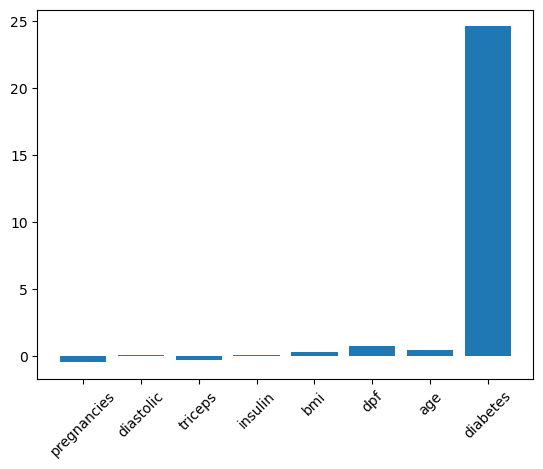

In [14]:
X = diabetis_df.drop("glucose", axis=1).values
y = diabetis_df["glucose"].values

names = diabetis_df.drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()